In [16]:
pip install seaborn scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv("../data/Online_Retail.csv", encoding='windows-1254')

In [19]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
358445,568147,22866,HAND WARMER SCOTTY DOG DESIGN,4,9/25/11 11:34,2.10,15044.0,United Kingdom
38338,539501,22464,HANGING METAL HEART LANTERN,6,12/20/10 11:08,1.65,17085.0,United Kingdom
496606,578347,21035,SET/2 RED RETROSPOT TEA TOWELS,1,11/24/11 9:26,6.63,NaN,United Kingdom
329711,565850,23407,SET OF 2 TRAYS HOME SWEET HOME,2,9/7/11 12:55,9.95,14530.0,United Kingdom
513750,579560,23206,LUNCH BAG APPLE DESIGN,2,11/30/11 11:31,1.65,15039.0,United Kingdom
355925,567980,23169,CLASSIC GLASS COOKIE JAR,1,9/23/11 11:22,4.15,15311.0,United Kingdom
313525,564510,37340,MULTICOLOUR SPRING FLOWER MUG,48,8/25/11 14:42,0.39,14194.0,United Kingdom
45694,540277,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,1/6/11 12:18,1.65,14258.0,United Kingdom
457406,575739,22629,SPACEBOY LUNCH BOX,2,11/11/11 9:05,4.13,NaN,United Kingdom
270056,C560540,23296,SET OF 6 TEA TIME BAKING CASES,-2,7/19/11 12:26,1.25,12415.0,Australia


In [20]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [25]:
df["CustomerID"] = df["CustomerID"].astype(int).astype(str)

In [26]:
def detect_outlier(data):
 """
 helper to detect outliers
 """
 outliers = []
 threshold = 3
 mean = np.mean(data)
 std = np.std(data)
 for y in data:
  z_score= (y - mean)/std
  if np.abs(z_score) > threshold:
   outliers.append(y)
 return outliers

num_cols = ["Quantity", "UnitPrice"]

for item in num_cols:
 if(item != 'CustomerID'):
  mean = np.mean(df[f'{item}'])
  print(f'Outliers {item} : {mean}') 
  outliers = detect_outlier(df[f'{item}'])
  df[f'{item}'].replace(outliers, mean, inplace=True)
  print(outliers)

Outliers Quantity : 12.06130339774205


/var/folders/xp/09_m9yj956x3kbv7qgpqgd6r0000gn/T/ipykernel_44182/2259886488.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[f'{item}'].replace(outliers, mean, inplace=True)


[-9360, 1824, 2880, 1400, 1440, 972, 972, 1008, 1008, 1000, 1488, 1394, 1728, 2400, 960, 1296, 860, 1010, 1356, 1284, 1930, 2000, 3114, 1300, 74215, -74215, 1440, 900, 2592, 800, 1200, 864, 1296, 1296, 1296, 2400, 1056, 1500, 2400, 3906, 1152, 1200, 1152, 864, 864, 768, 900, 800, 1200, 1296, 2160, 1000, 1440, 864, 1200, 1152, 864, 1152, 864, 1200, 1056, 1728, -1300, -1930, -2000, -3114, 1930, 1300, 2000, 3114, 960, 960, 960, 960, 1008, 1200, 1200, 1152, 2000, -960, 1350, 1200, -1350, 864, 2700, 906, 888, 888, 960, 4300, 1152, 1600, 1200, 1515, -1515, 864, 828, 768, 768, 1200, 864, 1440, 3186, 900, 960, 1440, 1440, 1440, 1000, 1008, 1900, 2880, 968, 824, -828, 1200, 2000, 1000, 1440, 1152, 840, 960, 1000, 864, 1788, 1878, 1944, 1944, 1428, 852, 1412, -756, 1200, 1000, 1200, 960, 1540, -1200, 1000, 1296, 840, 1296, -840, -1296, -1296, 1296, 840, 1728, 1200, 960, 960, 2400, 4800, 912, 1992, 3000, 864, 832, 992, 1020, 2100, 1200, 1200, 1000, 960, 864, 1000, 1600, 800, 800, 12540, 760, 774,

In [27]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Diff'] = max(df['InvoiceDate']) - df['InvoiceDate']
recency = df.groupby('CustomerID')['Diff'].min()
recency = recency.dt.days
recency = recency.reset_index()

/var/folders/xp/09_m9yj956x3kbv7qgpqgd6r0000gn/T/ipykernel_44182/2302467272.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [28]:
recency

,CustomerID,Diff
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309
...,...,...
4367,18280,277
4368,18281,180
4369,18282,7
4370,18283,3


In [29]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency

,CustomerID,InvoiceNo
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4367,18280,10
4368,18281,7
4369,18282,13
4370,18283,756


In [30]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()
monetary

,CustomerID,Amount
0,12346,25.087511
1,12347,4310.000000
2,12348,1797.240000
3,12349,1461.010471
4,12350,334.400000
...,...,...
4367,18280,180.600000
4368,18281,80.820000
4369,18282,176.600000
4370,18283,2094.880000


In [31]:
rfm = pd.merge(recency, frequency, on='CustomerID')
rfm = pd.merge(rfm, monetary, on='CustomerID')
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,325,2,25.087511
1,12347,1,182,4310.000000
2,12348,74,31,1797.240000
3,12349,18,73,1461.010471
4,12350,309,17,334.400000
...,...,...,...,...
4367,18280,277,10,180.600000
4368,18281,180,7,80.820000
4369,18282,7,13,176.600000
4370,18283,3,756,2094.880000


In [32]:
rfm_scaled = rfm[['Recency', 'Frequency', 'Monetary']]
rfm_scaled = StandardScaler().fit_transform(rfm_scaled)
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_scaled

,Recency,Frequency,Monetary
0,2.322023,-0.391720,-0.233555
1,-0.893733,0.382657,0.312245
2,-0.169196,-0.266959,-0.007823
3,-0.725005,-0.086271,-0.050651
4,2.163220,-0.327188,-0.194155
...,...,...,...
4367,1.845615,-0.357303,-0.213746
4368,0.882873,-0.370209,-0.226456
4369,-0.834182,-0.344397,-0.214255
4370,-0.873883,2.852058,0.030089


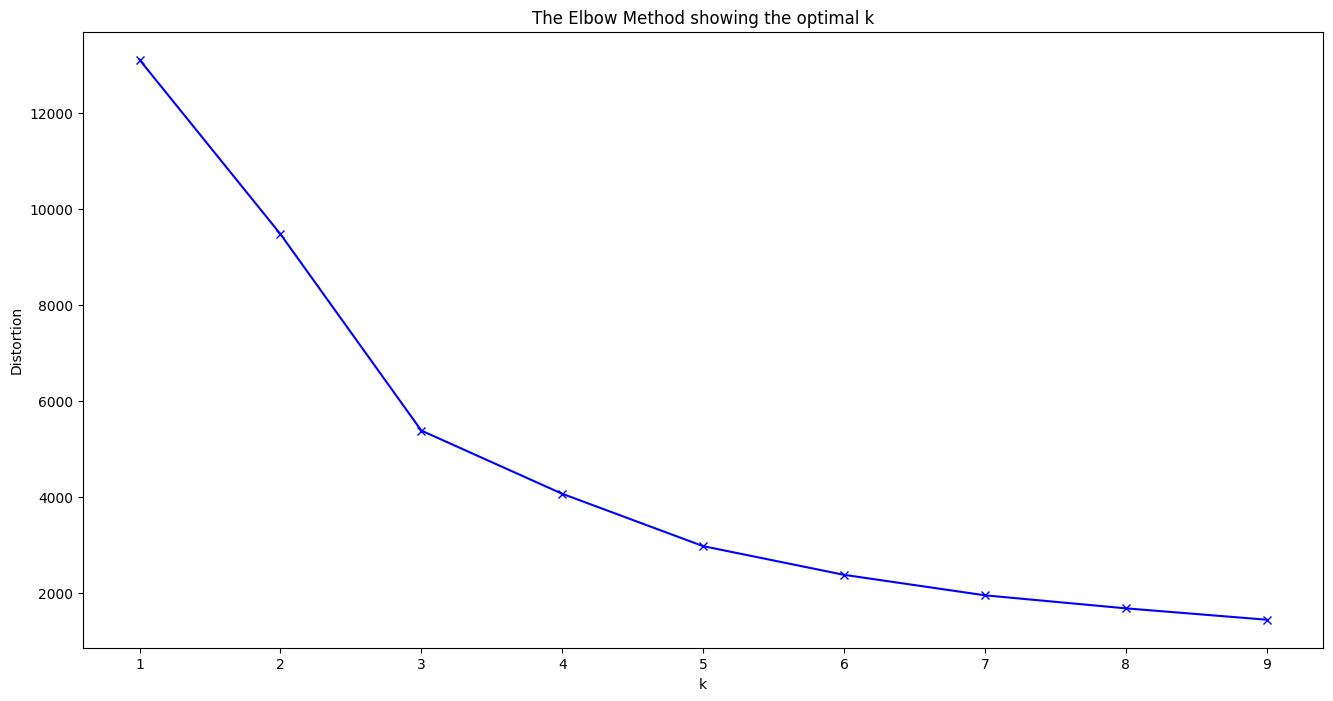

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


models = []
range_n_clusters = range(1, 10)

for num_cluster in range_n_clusters :
    kmeans = KMeans(n_clusters=num_cluster)
    kmeans.fit(rfm_scaled)
    models.append(kmeans)

distortions = [m.inertia_ for m in models]

plt.figure(figsize=(16,8))
plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [34]:
models[2].predict(rfm_scaled)

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [40]:
rfm["cluster"] = models[2].predict(rfm_scaled)

In [36]:
rfm

,CustomerID,Recency,Frequency,Monetary,cluster
0,12346,325,2,25.087511,0
1,12347,1,182,4310.000000,1
2,12348,74,31,1797.240000,1
3,12349,18,73,1461.010471,1
4,12350,309,17,334.400000,0
...,...,...,...,...,...
4367,18280,277,10,180.600000,0
4368,18281,180,7,80.820000,0
4369,18282,7,13,176.600000,1
4370,18283,3,756,2094.880000,1


In [42]:
print("\n**Estadísticas Descriptivas del RFM por Cluster:**")
rfm.groupby('cluster')[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'median', 'std',"count"])


**Estadísticas Descriptivas del RFM por Cluster:**


Recency                            Frequency                       \
               mean median        std count         mean  median          std   
cluster                                                                         
0        245.752952  240.0  68.084618  1101    27.665758    18.0    32.156280   
1         39.102792   28.0  35.242432  3259   105.008285    57.0   148.300707   
2          4.000000    1.5   6.646941    12  2845.583333  1971.0  2474.249508   

                    Monetary                                     
        count           mean         median           std count  
cluster                                                          
0        1101     445.659896     292.470000    674.545530  1101  
1        3259    1923.466275     897.430000   3877.353860  3259  
2          12  113900.122946  101000.317542  78119.963946    12

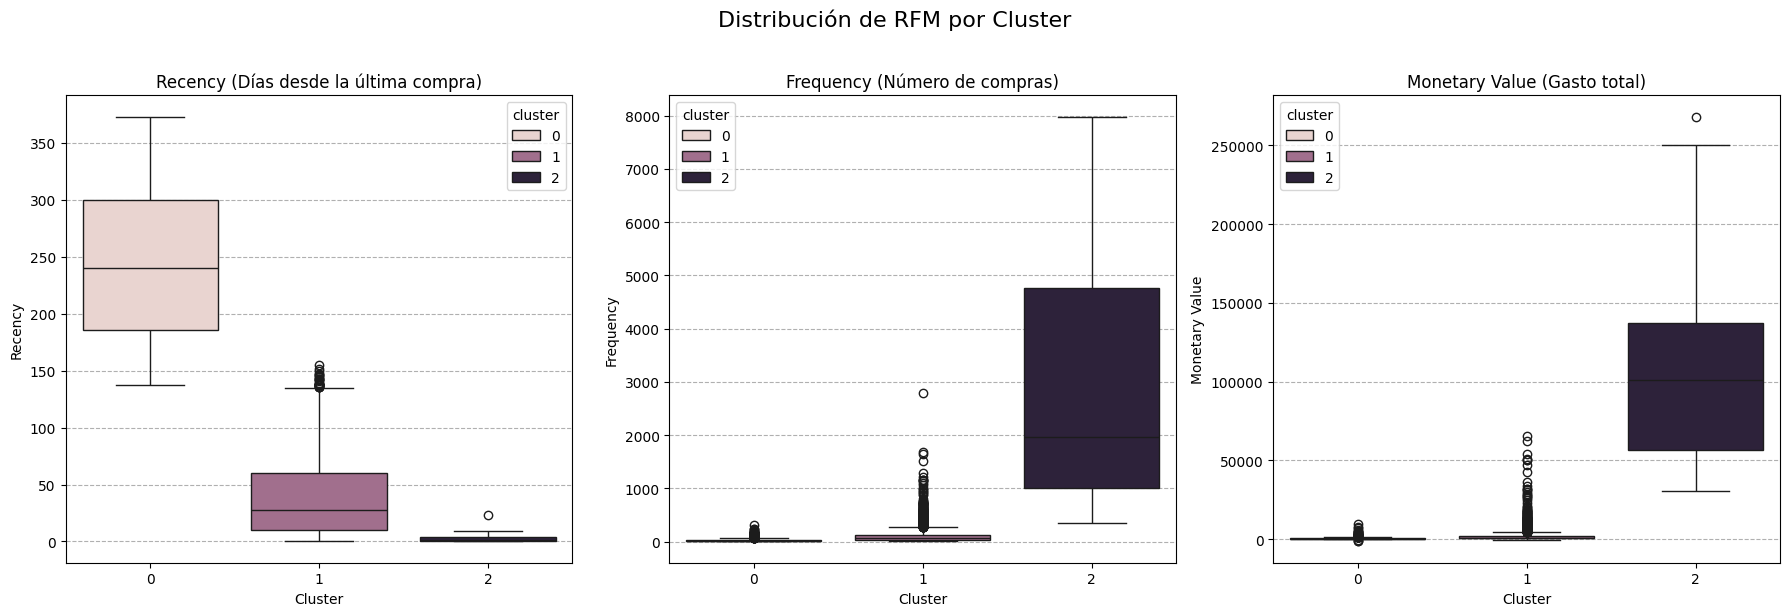

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.suptitle('Distribución de RFM por Cluster', fontsize=16, y=1.02)

# Boxplot para Recency
sns.boxplot(x='cluster', y='Recency', data=rfm, ax=axes[0], hue="cluster")
axes[0].set_title('Recency (Días desde la última compra)')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Recency')
axes[0].grid(axis='y', linestyle='--')

# Boxplot para Frequency
sns.boxplot(x='cluster', y='Frequency', data=rfm, ax=axes[1], hue="cluster")
axes[1].set_title('Frequency (Número de compras)')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', linestyle='--')

# Boxplot para Monetary Value
sns.boxplot(x='cluster', y='Monetary', data=rfm, ax=axes[2], hue="cluster")
axes[2].set_title('Monetary Value (Gasto total)')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Monetary Value')
axes[2].grid(axis='y', linestyle='--')

# 4. Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

/var/folders/xp/09_m9yj956x3kbv7qgpqgd6r0000gn/T/ipykernel_44182/1778511180.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(rfm['Recency'], rfm['Frequency'],  rfm['Monetary'], label=cluster ,s=100, alpha=0.5, cmap='winter')


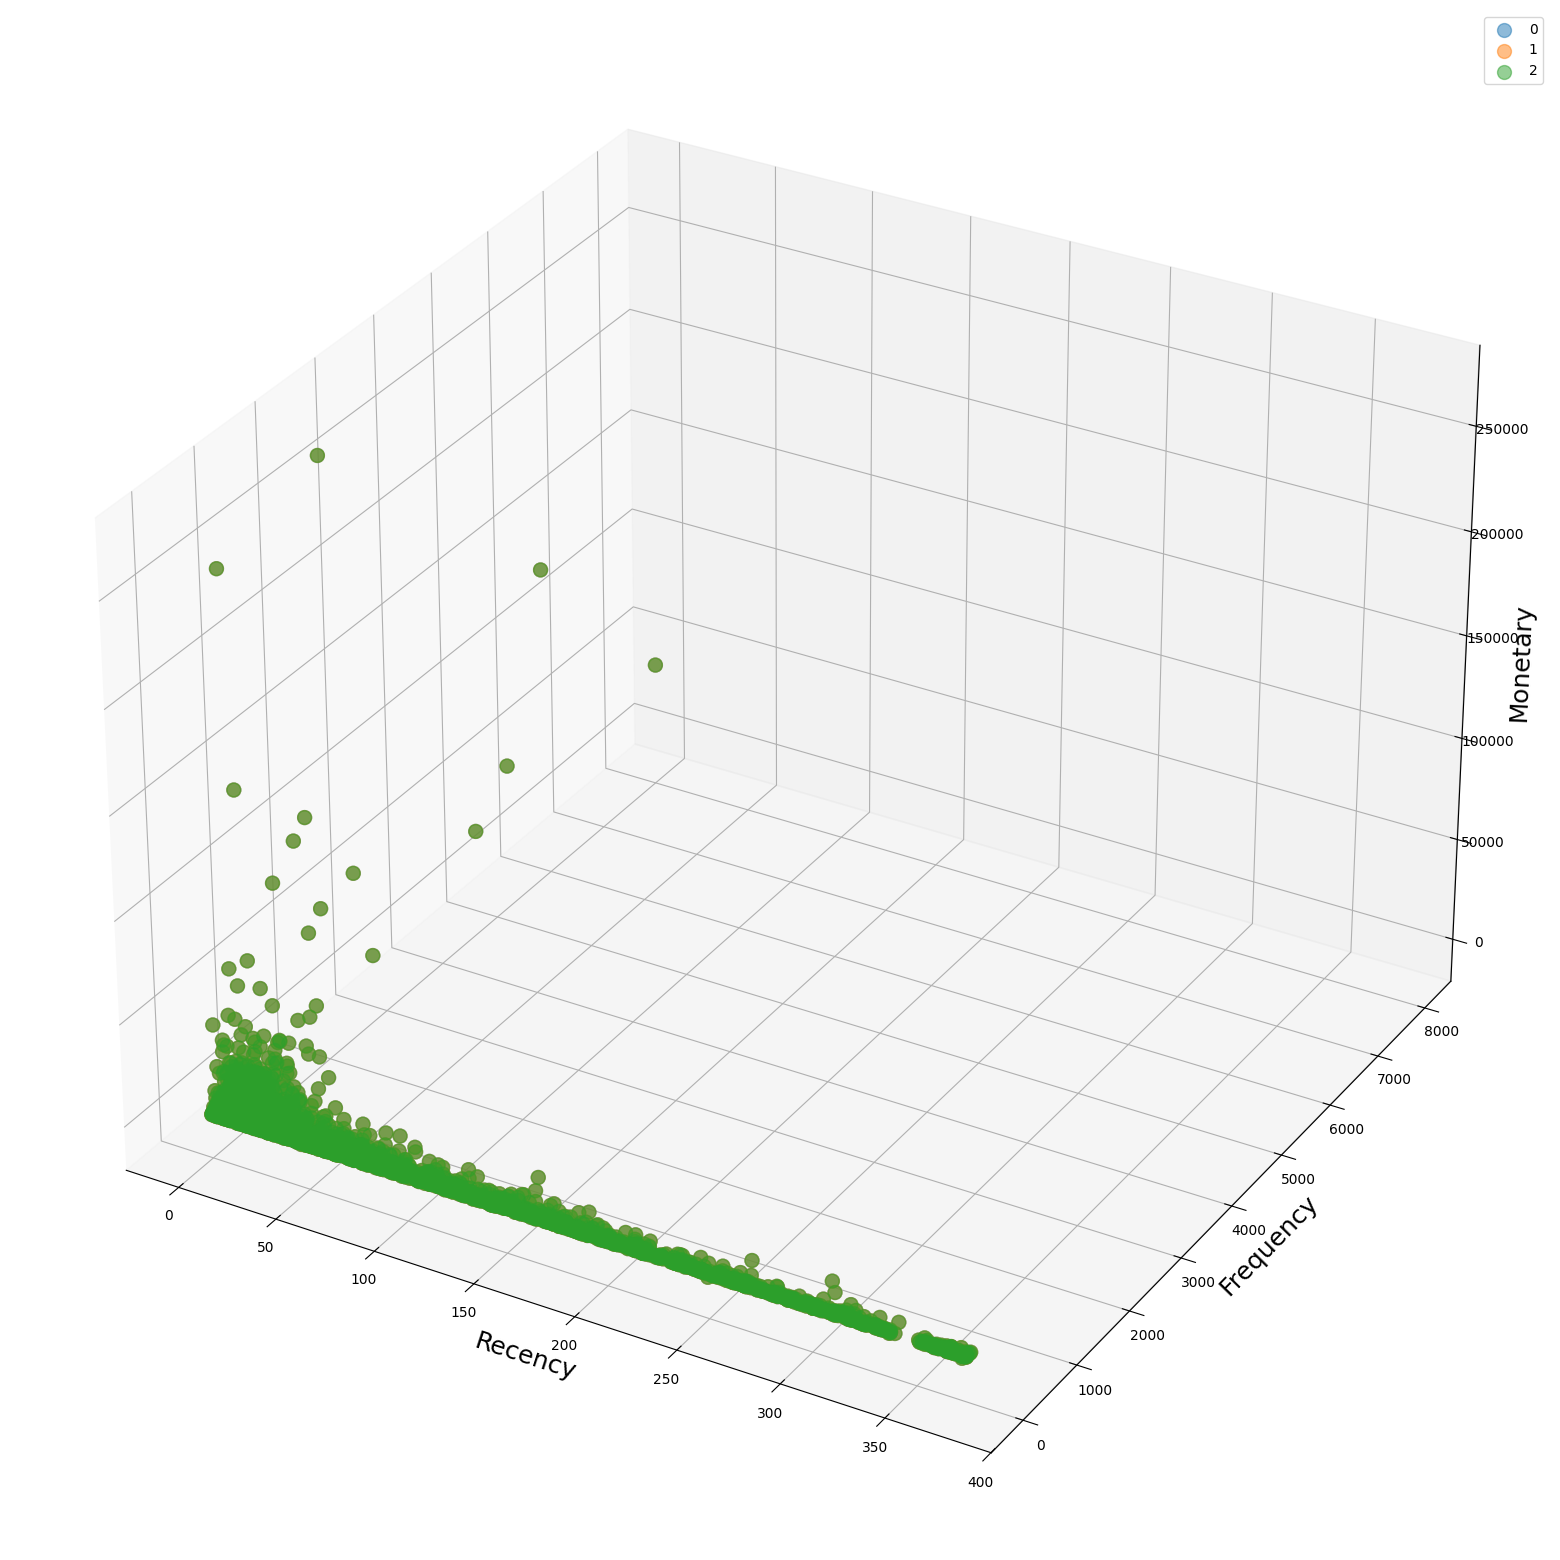

In [39]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
for cluster in rfm['cluster'].unique() :
  result_cluster = rfm.loc[rfm['cluster'] == cluster]
  ax.scatter(rfm['Recency'], rfm['Frequency'],  rfm['Monetary'], label=cluster ,s=100, alpha=0.5, cmap='winter')

ax.set_xlabel('Recency', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_zlabel('Monetary', fontsize=18)
ax.legend()
plt.show()